In [1]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
zip_file = keras.utils.get_file(
    fname="cora.tgz",
    origin="https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz",
    extract=True,
)
data_dir = os.path.join(os.path.dirname(zip_file), "cora")

180224/168052 [================================] - 0s 0us/step


In [3]:
citations = pd.read_csv(
    os.path.join(data_dir, "cora.cites"),
    sep="\t",
    header=None,
    names=["target", "source"],
)
print("Citations shape:", citations.shape)

Citations shape: (5429, 2)


In [4]:
citations.sample(frac=1).head()

,target,source
3821,87482,34266
311,910,42847
1310,6214,345340
1886,12576,56119
2995,38845,1110579


In [5]:
column_names = ["paper_id"] + [f"term_{idx}" for idx in range(1433)] + ["subject"]
papers = pd.read_csv(
    os.path.join(data_dir, "cora.content"), sep="\t", header=None, names=column_names,
)
print("Papers shape:", papers.shape)

Papers shape: (2708, 1435)


In [6]:
print(papers.sample(5).T)

                 482                     463                    211   \
paper_id       154134                 1120731                 714975   
term_0              0                       0                      0   
term_1              0                       0                      0   
term_2              0                       0                      0   
term_3              0                       0                      0   
...               ...                     ...                    ...   
term_1429           0                       0                      0   
term_1430           0                       0                      0   
term_1431           0                       0                      0   
term_1432           0                       0                      0   
subject    Case_Based  Reinforcement_Learning  Probabilistic_Methods   

                      1150                   1507  
paper_id            193932                  14431  
term_0                   0     

In [7]:
print(papers.subject.value_counts())

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: subject, dtype: int64


# Bring attack here, Comment out the code to see the difference before and after the attack to the model

In [8]:
citations.head() # Create a nx graph from this dataframe, then in that find the centrality, remove those edges or nodes from the dataframe, see if the accuracy changes

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960


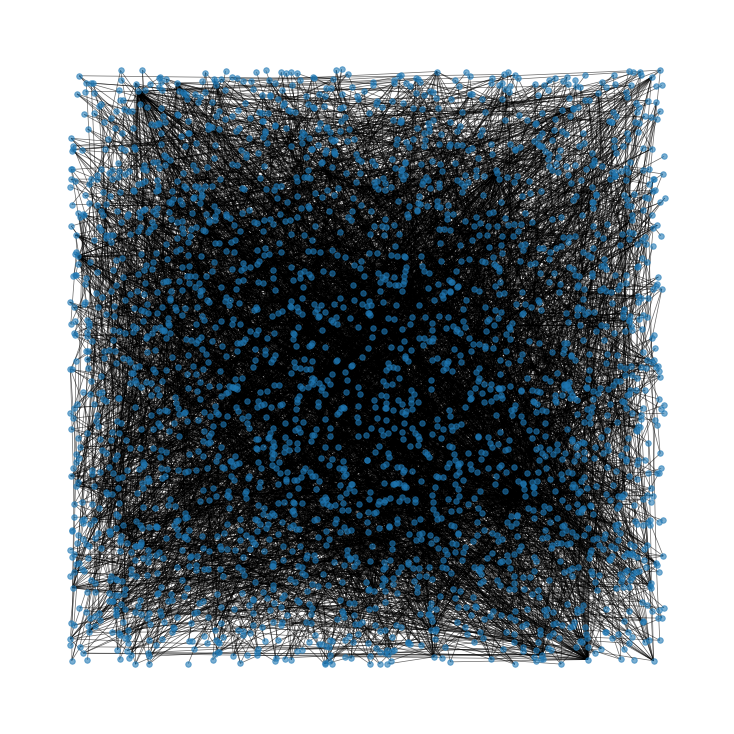

In [9]:
G = nx.from_pandas_edgelist(citations, "source", "target", create_using=nx.Graph())
plt.figure(figsize=(10,10))
pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False, pos = pos, node_size = 30, alpha = 0.6, width = 0.7)
plt.show()

In [10]:
centrality_between_edges=nx.edge_betweenness_centrality(G, k=200, normalized=True, weight=None, seed=None)

top_influential_btw = sorted(centrality_between_edges.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)[:175]
print(top_influential_btw)

top_influential_edges = [n[0] for n in top_influential_btw]
print(top_influential_edges)
print(citations.shape)

[((6913, 646286), 0.002342614800299744), ((4330, 6913), 0.0023070355363998883), ((65074, 714748), 0.002282493934889017), ((149669, 39890), 0.0017973485648415115), ((35, 887), 0.0017807390916159615), ((149669, 6214), 0.0017578777588932724), ((189571, 714748), 0.0015673120635438314), ((35, 1956), 0.001563125855695746), ((35, 1050679), 0.001488544933985316), ((1272, 560936), 0.0013340800219145746), ((16819, 646286), 0.0012676984245707954), ((424540, 48555), 0.0012574762405471018), ((48550, 48555), 0.0012324584441016624), ((560936, 1365), 0.001219526101458842), ((10798, 20193), 0.0012041043427855527), ((299197, 4330), 0.0011933144975771908), ((3229, 189577), 0.0011666601792279547), ((48550, 3229), 0.0011583004117369682), ((294030, 39890), 0.0011210521357023745), ((424540, 179702), 0.0011126031913541075), ((35, 263279), 0.0010896498266963304), ((39890, 714256), 0.0010569381874043127), ((141171, 179702), 0.0010032663279565697), ((1103960, 3229), 0.0009999017614376827), ((1050679, 3229), 0.00

In [11]:
for i in range(len(top_influential_edges)):
  citations = citations[~((citations['source'] == top_influential_edges[i][0]) & (citations['target'] == top_influential_edges[i][1]))]

print(citations.shape)

(5351, 2)


In [12]:
centrality = nx.eigenvector_centrality(G)

top_influential = sorted(centrality.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)[:110]
top_influential_nodes = [n[0] for n in top_influential]
print(top_influential_nodes)
print(citations.shape)

[35, 82920, 85352, 210871, 887, 1688, 12576, 287787, 84021, 35061, 103515, 54131, 41714, 66556, 33907, 575077, 503883, 38205, 69284, 259702, 141342, 273152, 1119708, 513189, 289780, 1154459, 1153280, 1152421, 593091, 1127913, 1153943, 210872, 1114331, 415693, 568857, 289781, 56119, 198653, 801170, 1129683, 634975, 54129, 98698, 307015, 608326, 132806, 787016, 573978, 647447, 44368, 28290, 503893, 640617, 1103960, 579008, 8865, 66563, 1136814, 1129778, 48766, 1153577, 190697, 578780, 135130, 573964, 634904, 634902, 1128453, 289779, 576725, 265203, 78511, 33904, 1130847, 634938, 248425, 97645, 69296, 1112911, 206371, 593260, 190706, 1129573, 1117476, 576795, 1113438, 646809, 197054, 263279, 1129027, 1127430, 574462, 561238, 593813, 1131360, 229635, 1033, 141347, 1153853, 263498, 18582, 1123756, 594047, 254923, 1153065, 1133338, 1103985, 694759, 387795, 128540]
(5351, 2)


In [13]:
# Maybe try deleting the top influential nodes from the citations dataframe
for i in range(len(top_influential_nodes)):
  citations = citations[(citations.source != top_influential_nodes[i]) & (citations.target != top_influential_nodes[i])]

print(citations.shape)

for i in range(len(top_influential_nodes)):
  papers = papers[papers.paper_id != top_influential_nodes[i]]
  

(4754, 2)


In [14]:
papers.head()

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,...,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In [15]:
class_values = sorted(papers["subject"].unique())
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate(sorted(papers["paper_id"].unique()))}

papers["paper_id"] = papers["paper_id"].apply(lambda name: paper_idx[name])
citations["source"] = citations["source"].apply(lambda name: paper_idx[name])
citations["target"] = citations["target"].apply(lambda name: paper_idx[name])
papers["subject"] = papers["subject"].apply(lambda value: class_idx[value])

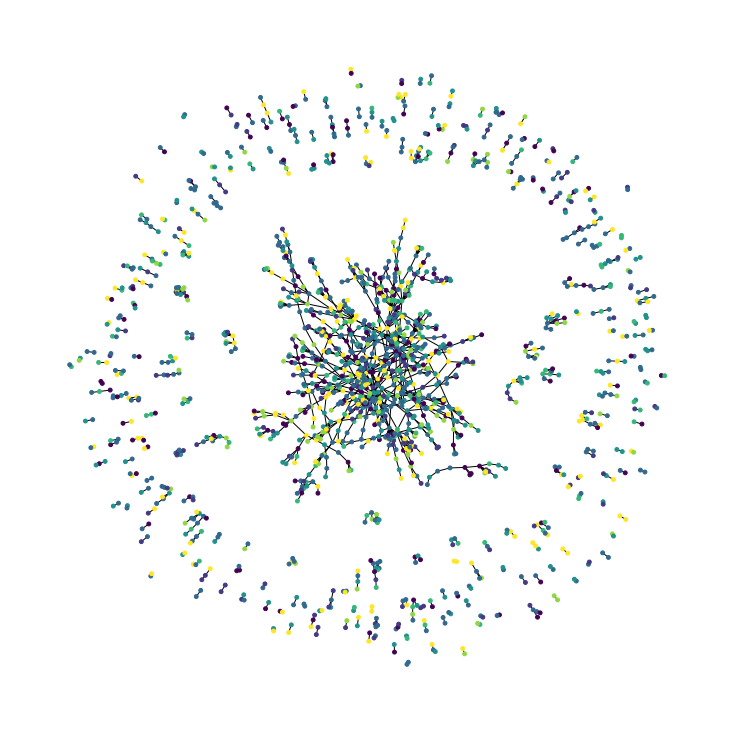

In [16]:
plt.figure(figsize=(10, 10))
colors = papers["subject"].tolist()
cora_graph = nx.from_pandas_edgelist(citations.sample(n=1500))
subjects = list(papers[papers["paper_id"].isin(list(cora_graph.nodes))]["subject"])
nx.draw_spring(cora_graph, node_size=15, node_color=subjects)

In [17]:
train_data, test_data = [], []

for _, group_data in papers.groupby("subject"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.5
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (1288, 1435)
Test data shape: (1310, 1435)


In [18]:
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 250
batch_size = 256

In [19]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

In [20]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

In [21]:
feature_names = set(papers.columns) - {"paper_id", "subject"}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["subject"]
y_test = test_data["subject"]

GRAPH PART

In [22]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = citations[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    papers.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 4754)
Nodes shape: (2598, 1433)


In [23]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [24]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super(GraphConvLayer, self).__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        num_nodes = tf.math.reduce_max(node_indices) + 1
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(node_indices, neighbour_messages)
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [25]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super(GNNNodeClassifier, self).__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

In [26]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[-0.1224113  -0.12525362 -0.05051342 -0.10722136  0.08830789 -0.02731493
  -0.0870491 ]
 [-0.10659246 -0.23778954 -0.08373329 -0.12029751  0.05608848  0.08306924
  -0.10024341]
 [-0.0642591  -0.1473454  -0.10243139 -0.0740872   0.1116887   0.00379024
  -0.04614724]], shape=(3, 7), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (2598, 32)                52804     
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                            

In [27]:
x_train = train_data.paper_id.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

Epoch 1/250
5/5 [==============================] - 11s 365ms/step - loss: 2.2254 - acc: 0.1920 - val_loss: 1.9197 - val_acc: 0.1856
Epoch 2/250
5/5 [==============================] - 1s 157ms/step - loss: 2.0018 - acc: 0.2495 - val_loss: 1.8962 - val_acc: 0.3247
Epoch 3/250
5/5 [==============================] - 1s 155ms/step - loss: 1.9309 - acc: 0.2541 - val_loss: 1.8851 - val_acc: 0.3351
Epoch 4/250
5/5 [==============================] - 1s 157ms/step - loss: 1.8575 - acc: 0.3007 - val_loss: 1.8711 - val_acc: 0.3299
Epoch 5/250
5/5 [==============================] - 1s 155ms/step - loss: 1.8814 - acc: 0.2980 - val_loss: 1.8616 - val_acc: 0.3299
Epoch 6/250
5/5 [==============================] - 1s 156ms/step - loss: 1.8444 - acc: 0.2962 - val_loss: 1.8554 - val_acc: 0.3247
Epoch 7/250
5/5 [==============================] - 1s 157ms/step - loss: 1.8292 - acc: 0.3080 - val_loss: 1.8530 - val_acc: 0.3402
Epoch 8/250
5/5 [==============================] - 1s 155ms/step - loss: 1.8087 - 

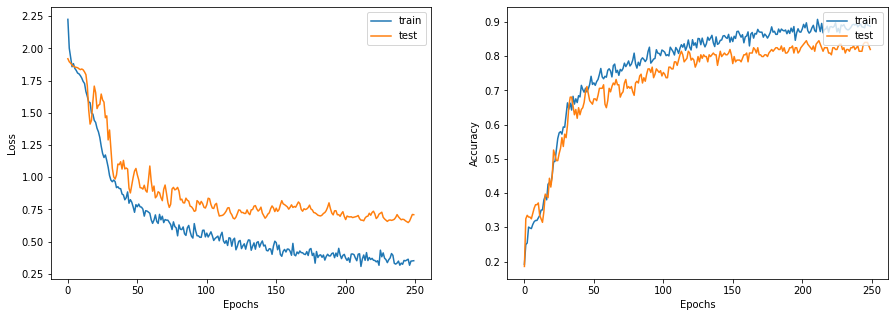

In [28]:
display_learning_curves(history)

In [29]:
x_test = test_data.paper_id.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 78.63%
